In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from circlePacking.shapefill import ShapeFill
import xml.etree.ElementTree as ET
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
df = pd.read_csv('grant.csv', sep=';')

In [3]:
# Find the minimum 'CallDecisionYear'
min_year = df['CallDecisionYear'].min()
print('min_year:', min_year)

min_year: 1975


In [4]:
df_2024 = df[df['CallDecisionYear'] == 2024]
df_since_2000 = df[df['CallDecisionYear'] >= 1985]
df_since_2000 = df[df['CallDecisionYear'] <= 2024]

In [5]:
df_2024

,GrantNumber,GrantNumberString,Title,TitleEnglish,ResponsibleApplicantName,FundingInstrumentPublished,FundingInstrumentReporting,FundingInstrumentLevel1,Institute,InstituteCity,...,MainFieldOfResearch_LevelB,AllFieldOfResearchs,EffectiveGrantStartDate,EffectiveGrantEndDate,AmountGrantedAllSets,Keywords,State,CallFullTitle,CallEndDate,CallDecisionYear
23,226697,40B1-0_226697,Meal Drinks Against Frailty: Elderly Nutrition...,NaN,"Bergfreund, Jotam",Bridge - Proof of Concept,Bridge - Proof of Concept,Programmes,Institut für Lebensmittel- und Ernährungswisse...,8092 Zürich,...,na,40/3210,2024-08-01T00:00:00Z,2025-07-31T00:00:00Z,130000.0,Meal Drink; Malnutrition; Formulation; Rheolog...,Ongoing,Bridge - Proof of Concept 2024 March,2024-03-04T00:00:00Z,2024
33,232544,10BP12_232544,"Politics of the Future: Living, leaving, and t...","Politics of the Future: Living, leaving, and t...","Pedersen, Oliver",Open Access Books,Open Access Books,Science communication,Institut de Psychologie et Education Universi...,2000 Neuchâtel,...,na,52/4401,2024-12-01T00:00:00Z,2025-05-31T00:00:00Z,3500.0,NaN,Approved,Open Access Books 2024,2024-12-31T00:00:00Z,2024
36,10002104,320030-231255,decodePI: decoding the genetic architecture of...,NaN,"Diss, Guillaume",Project funding,Project funding,Projects,Friedrich Miescher Institute for Biomedical Re...,4058 Basel,...,Biochemistry and cell biology/Bioinformatics a...,3101/3102/3105/4602/4611,2024-10-01T00:00:00Z,2028-09-30T00:00:00Z,800000.0,protein-protein interactions; genetic architec...,Ongoing,Project funding (03.04.2024),2024-04-03T00:00:00Z,2024
38,225472,P500PT_225472,Critical behaviour of statistical mechanics mo...,NaN,"Panis, Romain",Postdoc.Mobility,Fellowships,Careers,Institut Camille Jordan Université Claude Ber...,F-69622 Lyon,...,na,49,2024-09-01T00:00:00Z,2026-08-31T00:00:00Z,110600.0,Percolation; Spin models; Ising model; Sharpne...,Ongoing,Postdoc.Mobility 2024 February,2024-02-01T00:00:00Z,2024
39,10002976,200021-231762,Spatial and temporal characterization of soft ...,NaN,"David, Christian",Project funding,Project funding,Projects,Labor für Mikro- und Nanotechnologie Paul Sche...,5232 Villigen PSI,...,Synchrotrons and accelerators,5110/5102/5104,2025-01-01T00:00:00Z,2028-12-31T00:00:00Z,574720.0,NaN,Approved,Project funding (03.04.2024),2024-04-03T00:00:00Z,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86778,10000481,100018-227565,Understanding Tax Enforcement,NaN,"Weber, Matthias",Project funding,Project funding,Projects,Swiss Institute of Banking and Finance Univer...,9000 St. Gallen,...,na/Applied economics,38/3801,2024-09-01T00:00:00Z,2028-08-31T00:00:00Z,560278.0,tax enforcement; tax administration; preferenc...,Ongoing,Project funding (02.10.2023),2023-10-02T00:00:00Z,2024
86891,223357,PZ00P1_223357,The Silenced Salience of Masculinity. Gender a...,NaN,"Wyss, Anna",Ambizione,Ambizione,Careers,Institute of Social Anthropology Department of...,3012 Bern,...,Anthropology,4401/44,2025-02-01T00:00:00Z,2029-01-31T00:00:00Z,965481.0,NaN,Approved,Ambizione 2023,2023-11-01T00:00:00Z,2024
86902,10002212,320030-231316,Investigating the role of the psychedelic expe...,NaN,"Liechti, Matthias E",Project funding,Project funding,Projects,Klinische Pharmakologie & Toxikologie Univers...,4031 Basel,...,Pharmacology and pharmaceutical sciences,3214/3202,2024-11-01T00:00:00Z,2028-10-31T00:00:00Z,1200000.0,DMT; Psychedelic; Depression; Neuroplasticity;...,Ongoing,Project funding (03.04.2024),2024-04-03T00:00:00Z,2024
86925,10001174,IC00I0L-228023,Exploring Conditioned Pain Modulation in horse...,NaN,"Spadavecchia, Claudia",Project funding,Project funding,Projects,Anaesthesiology and Pain Therapy Section Dept....,3012 Bern,...,Veterinary sciences,3009/4602,2024-06-01T00:00:00Z,2028-05-31T00:00:00Z,670480.0,NaN,Approved,Project funding (02.10.2023),2023-10-02T00:00:00Z,2024


In [6]:
df_2024 = df_2024[['GrantNumber', 'Title', 'ResponsibleApplicantName', 'FundingInstrumentLevel1', 'Institute', 'InstituteCity', 'InstituteCountry', 'ResearchInstitution', 'MainDiscipline_Level1', 'MainDiscipline_Level2', 'MainFieldOfResearch_LevelA', 'AmountGrantedAllSets', 'State', 'CallDecisionYear', 'Keywords', 'EffectiveGrantStartDate', 'EffectiveGrantEndDate']]
df_since_2000 = df_since_2000[['GrantNumber', 'Title', 'ResponsibleApplicantName', 'FundingInstrumentLevel1', 'Institute', 'InstituteCity', 'InstituteCountry', 'ResearchInstitution', 'MainDiscipline_Level1', 'MainDiscipline_Level2', 'MainFieldOfResearch_LevelA', 'AmountGrantedAllSets', 'State', 'CallDecisionYear', 'Keywords', 'EffectiveGrantStartDate', 'EffectiveGrantEndDate']]
df_2024

,GrantNumber,Title,ResponsibleApplicantName,FundingInstrumentLevel1,Institute,InstituteCity,InstituteCountry,ResearchInstitution,MainDiscipline_Level1,MainDiscipline_Level2,MainFieldOfResearch_LevelA,AmountGrantedAllSets,State,CallDecisionYear,Keywords,EffectiveGrantStartDate,EffectiveGrantEndDate
23,226697,Meal Drinks Against Frailty: Elderly Nutrition...,"Bergfreund, Jotam",Programmes,Institut für Lebensmittel- und Ernährungswisse...,8092 Zürich,Switzerland,ETH Zurich - ETHZ,"Mathematics, Natural- and Engineering Sciences",Engineering Sciences,Engineering,130000.0,Ongoing,2024,Meal Drink; Malnutrition; Formulation; Rheolog...,2024-08-01T00:00:00Z,2025-07-31T00:00:00Z
33,232544,"Politics of the Future: Living, leaving, and t...","Pedersen, Oliver",Science communication,Institut de Psychologie et Education Universi...,2000 Neuchâtel,Switzerland,University of Neuchatel - NE,Humanities and Social Sciences,"Psychology, educational studies",Psychology,3500.0,Approved,2024,NaN,2024-12-01T00:00:00Z,2025-05-31T00:00:00Z
36,10002104,decodePI: decoding the genetic architecture of...,"Diss, Guillaume",Projects,Friedrich Miescher Institute for Biomedical Re...,4058 Basel,Switzerland,Institute Friedrich Miescher - FMI,NaN,NaN,Biological Sciences/Biological Sciences/Biolog...,800000.0,Ongoing,2024,protein-protein interactions; genetic architec...,2024-10-01T00:00:00Z,2028-09-30T00:00:00Z
38,225472,Critical behaviour of statistical mechanics mo...,"Panis, Romain",Careers,Institut Camille Jordan Université Claude Ber...,F-69622 Lyon,France,Institution abroad - France,"Mathematics, Natural- and Engineering Sciences",Mathematics,Mathematical Sciences,110600.0,Ongoing,2024,Percolation; Spin models; Ising model; Sharpne...,2024-09-01T00:00:00Z,2026-08-31T00:00:00Z
39,10002976,Spatial and temporal characterization of soft ...,"David, Christian",Projects,Labor für Mikro- und Nanotechnologie Paul Sche...,5232 Villigen PSI,Switzerland,Paul Scherrer Institute - PSI,NaN,NaN,Physical Sciences,574720.0,Approved,2024,NaN,2025-01-01T00:00:00Z,2028-12-31T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86778,10000481,Understanding Tax Enforcement,"Weber, Matthias",Projects,Swiss Institute of Banking and Finance Univer...,9000 St. Gallen,Switzerland,University of St.Gallen - SG,NaN,NaN,Economics/Economics,560278.0,Ongoing,2024,tax enforcement; tax administration; preferenc...,2024-09-01T00:00:00Z,2028-08-31T00:00:00Z
86891,223357,The Silenced Salience of Masculinity. Gender a...,"Wyss, Anna",Careers,Institute of Social Anthropology Department of...,3012 Bern,Switzerland,University of Berne - BE,Humanities and Social Sciences,"Ethnology, social and human geography",Human Society,965481.0,Approved,2024,NaN,2025-02-01T00:00:00Z,2029-01-31T00:00:00Z
86902,10002212,Investigating the role of the psychedelic expe...,"Liechti, Matthias E",Projects,Klinische Pharmakologie & Toxikologie Univers...,4031 Basel,Switzerland,University of Basel - BS,NaN,NaN,Biomedical and Clinical Sciences,1200000.0,Ongoing,2024,DMT; Psychedelic; Depression; Neuroplasticity;...,2024-11-01T00:00:00Z,2028-10-31T00:00:00Z
86925,10001174,Exploring Conditioned Pain Modulation in horse...,"Spadavecchia, Claudia",Projects,Anaesthesiology and Pain Therapy Section Dept....,3012 Bern,Switzerland,University of Berne - BE,NaN,NaN,"Agricultural, Veterinary and Food Sciences",670480.0,Approved,2024,NaN,2024-06-01T00:00:00Z,2028-05-31T00:00:00Z


In [7]:
# Replcace fields in column MainFieldOfResearch_LevelA to remove anything after '/' if '/' is in the title
df_2024['MainFieldOfResearch_LevelA'] = df_2024['MainFieldOfResearch_LevelA'].str.split('/').str[0]
df_since_2000['MainFieldOfResearch_LevelA'] = df_since_2000['MainFieldOfResearch_LevelA'].str.split('/').str[0]

/var/folders/l8/7h5sfbjn2ng3kg7y8p21r8qr0000gn/T/ipykernel_25771/4228593568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['MainFieldOfResearch_LevelA'] = df_2024['MainFieldOfResearch_LevelA'].str.split('/').str[0]


In [8]:
df_2024

,GrantNumber,Title,ResponsibleApplicantName,FundingInstrumentLevel1,Institute,InstituteCity,InstituteCountry,ResearchInstitution,MainDiscipline_Level1,MainDiscipline_Level2,MainFieldOfResearch_LevelA,AmountGrantedAllSets,State,CallDecisionYear,Keywords,EffectiveGrantStartDate,EffectiveGrantEndDate
23,226697,Meal Drinks Against Frailty: Elderly Nutrition...,"Bergfreund, Jotam",Programmes,Institut für Lebensmittel- und Ernährungswisse...,8092 Zürich,Switzerland,ETH Zurich - ETHZ,"Mathematics, Natural- and Engineering Sciences",Engineering Sciences,Engineering,130000.0,Ongoing,2024,Meal Drink; Malnutrition; Formulation; Rheolog...,2024-08-01T00:00:00Z,2025-07-31T00:00:00Z
33,232544,"Politics of the Future: Living, leaving, and t...","Pedersen, Oliver",Science communication,Institut de Psychologie et Education Universi...,2000 Neuchâtel,Switzerland,University of Neuchatel - NE,Humanities and Social Sciences,"Psychology, educational studies",Psychology,3500.0,Approved,2024,NaN,2024-12-01T00:00:00Z,2025-05-31T00:00:00Z
36,10002104,decodePI: decoding the genetic architecture of...,"Diss, Guillaume",Projects,Friedrich Miescher Institute for Biomedical Re...,4058 Basel,Switzerland,Institute Friedrich Miescher - FMI,NaN,NaN,Biological Sciences,800000.0,Ongoing,2024,protein-protein interactions; genetic architec...,2024-10-01T00:00:00Z,2028-09-30T00:00:00Z
38,225472,Critical behaviour of statistical mechanics mo...,"Panis, Romain",Careers,Institut Camille Jordan Université Claude Ber...,F-69622 Lyon,France,Institution abroad - France,"Mathematics, Natural- and Engineering Sciences",Mathematics,Mathematical Sciences,110600.0,Ongoing,2024,Percolation; Spin models; Ising model; Sharpne...,2024-09-01T00:00:00Z,2026-08-31T00:00:00Z
39,10002976,Spatial and temporal characterization of soft ...,"David, Christian",Projects,Labor für Mikro- und Nanotechnologie Paul Sche...,5232 Villigen PSI,Switzerland,Paul Scherrer Institute - PSI,NaN,NaN,Physical Sciences,574720.0,Approved,2024,NaN,2025-01-01T00:00:00Z,2028-12-31T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86778,10000481,Understanding Tax Enforcement,"Weber, Matthias",Projects,Swiss Institute of Banking and Finance Univer...,9000 St. Gallen,Switzerland,University of St.Gallen - SG,NaN,NaN,Economics,560278.0,Ongoing,2024,tax enforcement; tax administration; preferenc...,2024-09-01T00:00:00Z,2028-08-31T00:00:00Z
86891,223357,The Silenced Salience of Masculinity. Gender a...,"Wyss, Anna",Careers,Institute of Social Anthropology Department of...,3012 Bern,Switzerland,University of Berne - BE,Humanities and Social Sciences,"Ethnology, social and human geography",Human Society,965481.0,Approved,2024,NaN,2025-02-01T00:00:00Z,2029-01-31T00:00:00Z
86902,10002212,Investigating the role of the psychedelic expe...,"Liechti, Matthias E",Projects,Klinische Pharmakologie & Toxikologie Univers...,4031 Basel,Switzerland,University of Basel - BS,NaN,NaN,Biomedical and Clinical Sciences,1200000.0,Ongoing,2024,DMT; Psychedelic; Depression; Neuroplasticity;...,2024-11-01T00:00:00Z,2028-10-31T00:00:00Z
86925,10001174,Exploring Conditioned Pain Modulation in horse...,"Spadavecchia, Claudia",Projects,Anaesthesiology and Pain Therapy Section Dept....,3012 Bern,Switzerland,University of Berne - BE,NaN,NaN,"Agricultural, Veterinary and Food Sciences",670480.0,Approved,2024,NaN,2024-06-01T00:00:00Z,2028-05-31T00:00:00Z


In [9]:

# Minimal dataset just to prototype. Rename GrantNumber	to id, Title to title, AmountGrantedAllSets to amount, CallDecisionYear to year, and discard the rest
df_2024 = df_2024.rename(
    columns={
        "GrantNumber": "id",
        "Title": "title",
        "AmountGrantedAllSets": "amount",
        "CallDecisionYear": "year",
        "FundingInstrumentLevel1": "type",
        "MainFieldOfResearch_LevelA": "field",
        "EffectiveGrantStartDate": "start_date",
        "EffectiveGrantEndDate": "end_date",
        "Keywords": "keywords"
    }
)

df_since_2000 = df_since_2000.rename(
    columns={
        "GrantNumber": "id",
        "Title": "title",
        "AmountGrantedAllSets": "amount",
        "CallDecisionYear": "year",
        "FundingInstrumentLevel1": "type",
        "MainFieldOfResearch_LevelA": "field",
        "EffectiveGrantStartDate": "start_date",
        "EffectiveGrantEndDate": "end_date",
        "Keywords": "keywords"
    }
)

df_2000_save = df_since_2000.copy()


## Circle packing

In [10]:
df_2024 = df_2024[["id", "title", "amount", "year", "type", "field", "keywords", "start_date", "end_date"]]

In [11]:
# Pack circles in a cross
array_radius = df_2024["amount"].values
array_ids = df_2024["id"].values
# Amplify the difference between the smallest and the largest radius
array_radius = (array_radius - min(array_radius) + 1)**4
array_radius_rescaled = np.emath.logn(2, array_radius)/25
shape = ShapeFill("circlePacking/flag_upscaled.png")
# shape.read_image("flag.png")
shape.img = 255 - shape.img
shape.guard = 1000
shape.make_circles(array_radius=array_radius_rescaled)
shape.make_svg("circlePacking/flag_upscaled.svg")
# Write output to json
l_circle = []
for circle, id, unrounded_r in zip(shape.circles, array_ids, array_radius_rescaled):
    l_circle.append([id, circle.cx, circle.cy, circle.r])
    
# Remove min height and width
min_cx = min([circle.cx for circle in shape.circles])
min_cy = min([circle.cy for circle in shape.circles])
for circle in l_circle:
    circle[1] = circle[1] - min_cx
    circle[2] = circle[2] - min_cy
    
df_circle = pd.DataFrame(l_circle, columns=["id", "cx", "cy", "r"])
# df_circle.to_json('../app/public/data/grant_2024_circles.json', orient="records")

2906/800 circles placed successfully.


In [12]:
# Merge both datadrames on id
df_2024 = df_2024.merge(df_circle, on="id")

In [13]:
# Remove useless columns and save
df_to_save = df_2024[["id", "title", "amount", "type", "field", 'cx', 'cy', 'r']]
df_to_save.to_json('../app/public/data/grant_2024.json', orient='records')


## Keywords analysis

In [14]:


def parse_freedict_tei(filepath):
    """
    Parse a FreeDict TEI XML file (such as fra-eng.tei) and return a dictionary
    mapping the French headword (lowercased) to a list of its English translations.
    """
    tree = ET.parse(filepath)
    root = tree.getroot()
    
    # FreeDict dictionaries typically use this namespace in TEI
    namespace = "{http://www.tei-c.org/ns/1.0}"
    
    lookup_dict = {}
    
    # Iterate over every <entry> in the dictionary
    for entry in root.findall(f".//{namespace}entry"):
        # In your snippet, headwords appear under <form><orth>...</orth>
        forms = entry.findall(f"{namespace}form/{namespace}orth")
        if not forms:
            continue
        
        # Take the first <orth> as the main (French) headword
        # (You could collect all <orth> elements if you prefer.)
        foreign_word = forms[0].text.strip() if forms[0].text else None
        if not foreign_word:
            continue
        
        # Gather translations from <sense><cit type="trans"><quote>...</quote></cit></sense>
        translations = []
        for sense in entry.findall(f"{namespace}sense"):
            for cit in sense.findall(f"{namespace}cit[@type='trans']"):
                quote_el = cit.find(f"{namespace}quote")
                if quote_el is not None and quote_el.text:
                    translations.append(quote_el.text.strip())
        
        # Store only if we have at least one translation
        if translations:
            # You can store multiple translations or just the first one. Here we keep all.
            lookup_dict[foreign_word.lower()] = translations
    
    return lookup_dict

def detect_language(word, dictionaries):
    """
    Simple language detection by checking membership in each dictionary.
    dictionaries is expected to be a dict of { 'fra': dict_fra_eng, 'deu': dict_deu_eng, ... }.
    """
    word_lower = word.lower()
    for lang_code, dict_data in dictionaries.items():
        if word_lower in dict_data:
            return lang_code
    return None  # unknown

dict_fra_eng = parse_freedict_tei("dicts/fra-eng.tei")
dict_deu_eng = parse_freedict_tei("dicts/deu-eng.tei")
dict_ita_eng = parse_freedict_tei("dicts/ita-eng.tei")

def translate_word(word, dictionaries):
    """
    Attempt to find the word in each dictionary. If found, return the English translation.
    Otherwise, return None or a placeholder.
    """
    lang_code = detect_language(word, dictionaries)
    if lang_code is not None:
        return dictionaries[lang_code].get(word.lower())
    else:
        return None

# Example usage
dictionaries = {
    'fra': dict_fra_eng,
    'deu': dict_deu_eng,
    'ita': dict_ita_eng,
    # etc.
}


In [15]:
df_keywords = df_since_2000[["id", "title", "amount", "type", "field", "keywords", "year"]]

# Remove rows without keywords
df_keywords = df_keywords.dropna(subset=["keywords"])

# Remove bad keywords such as "(f)", single letter keywords, 'you', 'tion'
df_keywords = df_keywords[~df_keywords["keywords"].str.contains(r"\(f\)")]
df_keywords = df_keywords[~df_keywords["keywords"].str.contains(r"\b\w\b")]
df_keywords = df_keywords[~df_keywords["keywords"].str.endswith("you")]
df_keywords = df_keywords[~df_keywords["keywords"].str.contains(r"\btion\b")]

df_keywords_init = df_keywords.copy()

In [36]:
dic_df_keywords = {}
for year in range (1990, 2023, 1):
    
    # Only keep grants from year - 2 to year +2
    df_keywords = df_keywords_init[df_keywords_init["year"] >= year - 2]
    df_keywords = df_keywords[df_keywords["year"] <= year +2]
        
    # Create a feature vector for each keyword
    keywords = df_keywords["keywords"].str.split(";")
    keywords = keywords.explode()
    keywords = keywords.str.strip()
    keywords = keywords.str.lower()

    # Only keep keywords that appear at least in 10 grants
    keywords = keywords.groupby(keywords).filter(lambda x: len(x) >= 8)

    # Remove duplicates
    keywords = keywords.drop_duplicates()

    # Reset index
    keywords = keywords.reset_index(drop=True)
    
    # Translate all keywords
    translated_keywords = []
    for keyword in keywords:
        eng = translate_word(keyword, dictionaries)
        if eng:
            translated = eng[0]
        else:
            translated = keyword
        translated_keywords.append(translated)

    # Create a dataframe with the translated keywords
    translated_keywords = pd.Series(translated_keywords)

    # Remove duplicates
    translated_keywords = translated_keywords.drop_duplicates()
    
    # Create a feature matrix, with grants a rows and keywords as columns
    df_feature_matrix = pd.DataFrame(0, index=df_keywords.index, columns=translated_keywords)

    for i, row in df_keywords.iterrows():
        for keyword in row["keywords"].split(";"):
            k = keyword.strip().lower()
            eng = translate_word(k, dictionaries)
            if eng:
                translated = eng[0]
            else:
                translated = k
            if translated in df_feature_matrix.columns:
                df_feature_matrix.at[i, translated] = 1
        

    # Create the target vector
    df_target = df_keywords["amount"]

    # Do a linear regression on the full dataset
    reg = Lasso(alpha=1, selection= 'cyclic', positive=True).fit(df_feature_matrix, df_target, )

    # Show the top 10 keywords and their coefficients
    df_keywords_coeff = pd.DataFrame({"keyword": translated_keywords, "coeff": reg.coef_})

    df_keywords_coeff = df_keywords_coeff.sort_values(by="coeff", ascending=False)

    # Only keep non-zero coefficients
    df_keywords_coeff = df_keywords_coeff[df_keywords_coeff["coeff"] != 0]

    # Normalize values between -100 and 100
    df_keywords_coeff["coeff"] = df_keywords_coeff["coeff"] / max(abs(df_keywords_coeff["coeff"])) * 100
    
    # Add to dictionary
    dic_df_keywords[year] = df_keywords_coeff

In [37]:
# Merge all dataframes, adding the year as a column
df_all = pd.concat(dic_df_keywords, keys=dic_df_keywords.keys()).reset_index(level=0)
df_all = df_all.rename(columns={"level_0": "year"})
df_all = df_all.reset_index(drop=True)

# Only keep keywords that have been around for at least 5 years
df_all = df_all.groupby("keyword").filter(lambda x: len(x) >= 8)

# Only keep keywords that have a coefficient that reached a value above 10 or below -10 in at least one year
#df_all = df_all.groupby("keyword").filter(lambda x: max(x["coeff"]) > 50 or min(x["coeff"]) < -25)

# Only keep keywords that have a coefficient that reached a value above 20 in at least two years
df_all = df_all.groupby("keyword").filter(lambda x: len(x[x["coeff"] > 40]) >= 3)

# Print number of positive and negative coefficients
print("Positive coefficients")
print(df_all[df_all["coeff"] > 0].groupby("keyword").count().shape[0])
print("Negative coefficients")
print(df_all[df_all["coeff"] < 0].groupby("keyword").count().shape[0])

print(df_all[df_all["coeff"] <0]['keyword'].unique())


print(df_all[df_all["coeff"] >0]['keyword'].unique())

print(len(df_all["keyword"].unique()))


Positive coefficients
30
Negative coefficients
0
[]
['recdna' 'catalysis' 'dynamics' 'particle physics' 'crystal growth'
 'Atlas' 'quantum dots' 'health' 'information theory'
 'sustainable development' 'astrophysics' 'mortality' 'kidney'
 'standard model' 'conflict' 'longitudinal study' 'string theory'
 'brain imaging' 'synapse' 'cardiovascular diseases' 'robotics'
 'resilience' 'mirna' 'synthetic biology' 'chemistry' 'atmosphere'
 'exoplanets' 'microbiota' 'energy storage' 'quantum computing']
30


In [38]:

# Create a dictionnary with the keywords as key and the array of coefficient (one per year, zero if absent) as value
dic_keywords = {}
min_year = df_all["year"].min()
for keyword in df_all["keyword"].unique():
    dic_keywords[keyword] = [0]*len(df_all["year"].unique())

for i, row in df_all.iterrows():
    dic_keywords[row["keyword"]][row["year"] - min_year] = row["coeff"]
    # Smooth the values
    weights = np.array([0.1, 0.8, 0.1])  # Center point has higher weight
    dic_keywords[row["keyword"]] = np.convolve(dic_keywords[row["keyword"]], weights, mode='same').tolist()
    
year_range = [int(x) for x in sorted(df_all["year"].unique())]

# Sort keys of dic_keywords such that keywords that reach their max value first (in terms of year) are first
l_year_max_value = []
for keyword in dic_keywords:
    l_year_max_value.append([keyword, np.argmax(dic_keywords[keyword])])
    
l_year_max_value = sorted(l_year_max_value, key=lambda x: x[1])

# Sort the dict
dic_keywords_sorted = {}
for keyword, _ in l_year_max_value:
    dic_keywords_sorted[keyword] = dic_keywords[keyword]
    
del dic_keywords
dic_keywords = dic_keywords_sorted


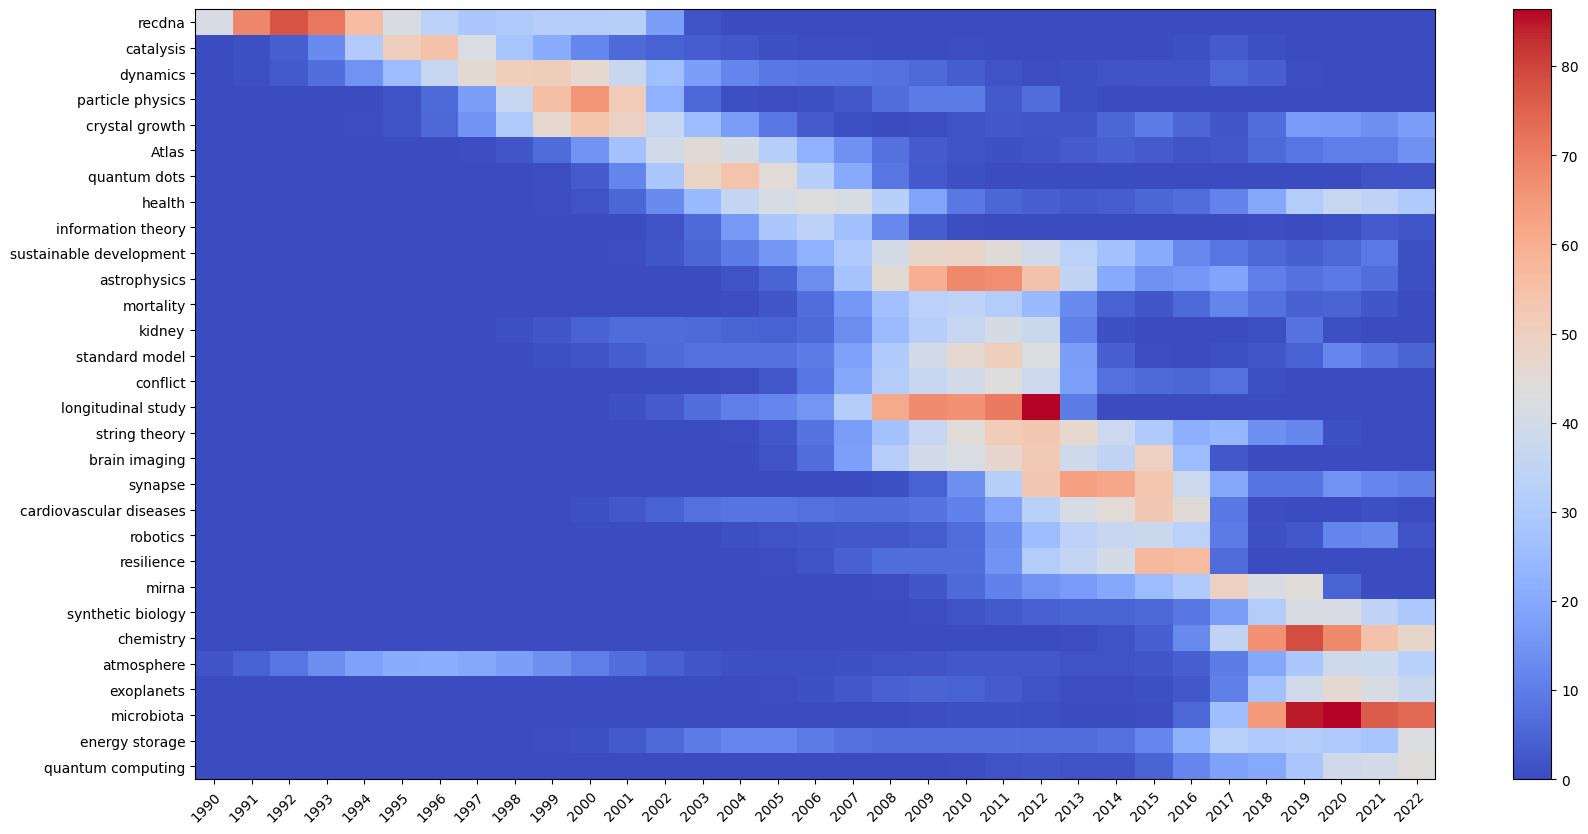

In [39]:
# Plot the score evolution per year for all keywords as a heatmap
fig, ax = plt.subplots(figsize=(20, 10))
heatmap = ax.imshow([dic_keywords[keyword] for keyword in dic_keywords.keys()], cmap='coolwarm', aspect='auto')
ax.set_xticks(range(len(year_range)))
ax.set_xticklabels(year_range)
ax.set_yticks(range(len(df_all["keyword"].unique())))
ax.set_yticklabels(df_all["keyword"].unique())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.colorbar(heatmap)
plt.show()



In [20]:
dic_keywords

{'particle physics': [21.5540924324521,
  36.06864752040666,
  40.230885476330535,
  35.351040150327044,
  25.984220101058547,
  17.159324154605102,
  11.546055460618776,
  8.992289226169168,
  8.35622791116387,
  8.28362069120426,
  7.596419395260507,
  5.987593444556173,
  3.6032791129082637,
  1.4022393787360237,
  0.5023630416491597,
  0.7186521511403695,
  1.4918560840444306,
  1.7882545518109132,
  1.800773075119257,
  5.6595717002851735,
  3.8053026882173073,
  0.3953008170154113,
  0.0,
  0.0,
  0.0],
 'crystal growth': [30.378004945068124,
  54.25407882794393,
  65.02151867957944,
  51.50683224013518,
  22.49534575898848,
  5.6294217681119445,
  0.9200237598886912,
  0.4617271738847297,
  1.0558276326492466,
  2.5385896012195355,
  6.680333190939125,
  9.822799898992194,
  9.792741929775877,
  2.864349711070323,
  6.5261243068449435,
  0.8004364750888509,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Atlas': [24.95447882441921,
  44.9486934834738,
  53.3990

In [21]:
data = {
    "keywords": dic_keywords,
    "year_range": year_range
}
# Save the data as a json (dic_keywords and year_range)
import json
with open('../app/public/data/keywords.json', 'w') as f:
    json.dump(data, f)


In [22]:
# Find all grants containing the keyword "cardiovascular diseases" in df_since_2000 (remove nan from df_since_2000 first)
df_since_2000 = df_since_2000.dropna(subset=["keywords"])
df_cardio = df_since_2000[df_since_2000["keywords"].str.contains("cardiovascular diseases")]

df_cardio



,id,title,ResponsibleApplicantName,type,Institute,InstituteCity,InstituteCountry,ResearchInstitution,MainDiscipline_Level1,MainDiscipline_Level2,field,amount,State,year,keywords,start_date,end_date
2089,134335,Novel Signaling via a Naturally Occurring Huma...,"Kleine-Brüggeney, Maren",Careers,Department of Anesthesiology School of Medicin...,98195 Seattle,United States of America,Institution abroad - United States of America,Biology and Medicine,Basic Medical Sciences,Biomedical and Clinical Sciences,48400.0,Completed,2010,"adrenoceptors; adrenergic, alpha-1A-, receptor...",2011-01-01T00:00:00Z,2011-12-31T00:00:00Z
2090,140095,Novel Signaling via a Naturally Occurring Huma...,"Kleine-Brüggeney, Maren",Careers,Department of Anesthesiology School of Medicin...,98195 Seattle,United States of America,Institution abroad - United States of America,Biology and Medicine,Basic Medical Sciences,Biomedical and Clinical Sciences,22775.0,Completed,2011,"hypertension; adrenergic, alpha-1A-, receptor,...",2012-01-01T00:00:00Z,2012-06-30T00:00:00Z
7078,197655,Molecular mechanism and translational relevanc...,"Döring, Yvonne",Projects,Universitätsklinik für Angiologie Departement ...,3010 Bern,Switzerland,University of Berne - BE,Biology and Medicine,Basic Medical Sciences,Biomedical and Clinical Sciences,632000.0,Ongoing,2020,atherosclerosis; inflammation; cardiovascular ...,2021-04-01T00:00:00Z,2025-12-31T00:00:00Z
20711,200557,Multivariate spatio-temporal models with laten...,"Mira, Antonietta",Projects,Data Science Lab Institute of Computational Sc...,6904 Lugano,Switzerland,Università della Svizzera italiana - USI,"Mathematics, Natural- and Engineering Sciences",Mathematics,Mathematical Sciences,781645.0,Ongoing,2021,Spatio-temporal statistical models; Statistica...,2021-05-01T00:00:00Z,2025-04-30T00:00:00Z
24195,10002862,"Geospatial clustering of heavy metals, auto-an...","Vuilleumier, Nicolas",Projects,Clinical Proteomics and Chemistry Department o...,1211 Genève 9,Switzerland,University of Geneva - GE,NaN,NaN,Biomedical and Clinical Sciences,949892.0,Ongoing,2024,autoantibodies; pollution; cardiovascular dise...,2025-01-01T00:00:00Z,2028-12-31T00:00:00Z
30231,110441,Recherche et formation en épidémiologie clinique,"Bize, Raphael",Careers,Physical Activity & Population Health Center f...,"T6G 2T2 Edmonton, Alberta",Canada,Institution abroad - Canada,Biology and Medicine,Preventive Medicine (Epidemiology/Early Diagno...,Biomedical and Clinical Sciences,49800.0,Completed,2005,physical activity; health promotion; cardiovas...,2005-09-01T00:00:00Z,2006-08-31T00:00:00Z
36500,155105,The effect of human genetic variants on the re...,"Benaglio, Paola",Careers,Department of Pediatrics University of Califor...,92093-0934 La Jolla,United States of America,Institution abroad - United States of America,Biology and Medicine,Basic Biological Research,Biological Sciences,70247.0,Completed,2014,cardiovascular diseases; genetic association s...,2014-06-01T00:00:00Z,2015-11-30T00:00:00Z
36501,167612,iPSC-derived cardiomyocytes for examining the ...,"Benaglio, Paola",Careers,Department of Pediatrics University of Califor...,92093-0934 La Jolla,United States of America,Institution abroad - United States of America,Biology and Medicine,Basic Biological Research,Biological Sciences,83955.0,Completed,2016,functional genomics; genetic association studi...,2016-10-01T00:00:00Z,2018-03-31T00:00:00Z
37688,10002565,Sex- and pathology-related differences in the ...,"Marsano, Anna",Projects,Departement Biomedizin Universität Basel,4031 Basel,Switzerland,University of Basel - BS,NaN,NaN,Biomedical and Clinical Sciences,999416.0,Ongoing,2024,cardiovascular diseases; sex differences; card...,2024-11-01T00:00:00Z,2028-10-31T00:00:00Z
39433,115378,Molecular and pathophysiologic characterizatio...,"Domenighetti, Andrea",Careers,Department of Medicine University of California,92093-0613 La Jolla,United States of America,Institution abroad - United States of America,Biology 

In [23]:
x = dic_df_keywords[2000]
x

,keyword,coeff
101,crystal growth,100.000000
120,lep,96.778958
112,Atlas,82.823671
113,particle physics,66.860996
45,magnetosphere,65.039032
...,...,...
35,cytoskeleton,1.903258
66,self-assembly,1.541528
111,meteorites,1.471432
0,clusters,1.262380


## County analysis

In [24]:
# Only keep grants in Switzerland
df_2000 = df_2000_save[df_2000_save['InstituteCountry'] == 'Switzerland']

In [25]:
# Load post-codes.csv
df_postcodes = pd.read_csv('post-codes.csv')

In [26]:
df_2000['County'] = df_2000['InstituteCity'].dropna().str.split(' ').map(lambda x: x[0])

# Cast to int (remove from df if not possible)
df_2000['County'] = pd.to_numeric(df_2000['County'], errors='coerce')

# Remove NaN
df_2000 = df_2000.dropna(subset=['County'])

df_2000

/var/folders/l8/7h5sfbjn2ng3kg7y8p21r8qr0000gn/T/ipykernel_25771/3995992885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000['County'] = df_2000['InstituteCity'].dropna().str.split(' ').map(lambda x: x[0])
/var/folders/l8/7h5sfbjn2ng3kg7y8p21r8qr0000gn/T/ipykernel_25771/3995992885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000['County'] = pd.to_numeric(df_2000['County'], errors='coerce')


,id,title,ResponsibleApplicantName,type,Institute,InstituteCity,InstituteCountry,ResearchInstitution,MainDiscipline_Level1,MainDiscipline_Level2,field,amount,State,year,keywords,start_date,end_date,County
0,100348,From behavioral ecology to population genetics...,"Perrin, Nicolas",Projects,Département d'Ecologie et d'Evolution Faculté ...,1015 Lausanne,Switzerland,University of Lausanne - LA,Biology and Medicine,General Biology,Biological Sciences,274800.0,Completed,2003,Population genetics; breeding systems; sex-bia...,2003-04-01T00:00:00Z,2005-07-31T00:00:00Z,1015.0
1,147091,The evolution of sex chromosomes: a perspectiv...,"Perrin, Nicolas",Projects,Département d'Ecologie et d'Evolution Faculté ...,1015 Lausanne,Switzerland,University of Lausanne - LA,Biology and Medicine,General Biology,Biological Sciences,840000.0,Completed,2013,sex chromosome evolution; X-Y recombination; a...,2013-06-01T00:00:00Z,2016-05-31T00:00:00Z,1015.0
5,55475,Quantifying sex-specific gene flow in Crocidur...,"Perrin, Nicolas",Projects,Département d'Ecologie et d'Evolution Faculté ...,1015 Lausanne,Switzerland,University of Lausanne - LA,Biology and Medicine,General Biology,Biological Sciences,86700.0,Completed,1999,NaN,2000-01-01T00:00:00Z,2001-12-31T00:00:00Z,1015.0
7,38762,Size-dependences in predator-prey interactions...,"Perrin, Nicolas",Careers,Ethologische Station Hasli Institut für Ökolog...,3032 Hinterkappelen,Switzerland,University of Berne - BE,Biology and Medicine,General Biology,Biological Sciences,776871.0,Completed,1993,NaN,1994-01-01T00:00:00Z,2000-12-31T00:00:00Z,3032.0
8,108100,Demogenetics in metapopulations,"Perrin, Nicolas",Projects,Département d'Ecologie et d'Evolution Faculté ...,1015 Lausanne,Switzerland,University of Lausanne - LA,Biology and Medicine,General Biology,Biological Sciences,889548.0,Completed,2005,Demography; metapopulations; fragmentation; ge...,2005-08-01T00:00:00Z,2010-08-31T00:00:00Z,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86974,206131,Liber Aurelii: critical edition by Philipp Roelli,"Roelli, Philipp",Science communication,Seminar für Griechische und Lateinische Philol...,8001 Zürich,Switzerland,University of Zurich - ZH,Humanities and Social Sciences,"Theology & religious studies, history, classic...","History, Heritage and Archaeology",6500.0,Completed,2021,critical edition; history of medicine; Latin p...,2021-09-01T00:00:00Z,2022-02-28T00:00:00Z,8001.0
86975,191183,"Handbook of Stemmatology: History, Methodology...","Roelli, Philipp",Science communication,Seminar für Griechische und Lateinische Philol...,8001 Zürich,Switzerland,University of Zurich - ZH,Humanities and Social Sciences,"Theology & religious studies, history, classic...","History, Heritage and Archaeology",25000.0,Completed,2019,Stemmatology; Textual Criticism; Evolution; St...,2019-10-01T00:00:00Z,2020-03-31T00:00:00Z,8001.0
86976,149772,Positive Interventions: Empirical studies on e...,"Proyer, René",Projects,Institut für Psychologie Universität Zürich,8050 Zürich,Switzerland,University of Zurich - ZH,Humanities and Social Sciences,"Psychology, educational studies",Psychology,117121.0,Completed,2013,humor; playfulness; life satisfaction; positiv...,2014-01-01T00:00:00Z,2014-12-31T00:00:00Z,8050.0
86977,132512,Positive Interventions: Empirical studies on e...,"Proyer, René",Projects,Institut für Psychologie Universität Zürich,8050 Zürich,Switzerland,University of Zurich - ZH,Humanities and Social Sciences,"Psychology, educational studies",Psychology,317018.0,Completed,2010,positive psycholoy; positive interventions; pe...,2010-12-01T00:00:00Z,2013-12-31T00:00:00Z,8050.0


In [27]:
# Remove duplicate zip
df_postcodes = df_postcodes.drop_duplicates(subset=['zip'])

# Set zip as index
df_postcodes = df_postcodes.set_index('zip')
# Each zip in df_2024['County'] is associated with a canton in df_postcodes['region'], map it
# df_2024['CountyCode'] = df_2024['County'].map(lambda x: df_postcodes.loc[int(x), 'region'])
for index, row in df_2000.iterrows():
    try:
        df_2000.at[index, 'County'] = df_postcodes.loc[int(row['County']), 'region']
    except KeyError:
        df_2000.at[index, 'County'] = np.nan

# Remove NaN
df_2000 = df_2000.dropna(subset=['County'])

/var/folders/l8/7h5sfbjn2ng3kg7y8p21r8qr0000gn/T/ipykernel_25771/1864511582.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'VD' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_2000.at[index, 'County'] = df_postcodes.loc[int(row['County']), 'region']


In [28]:
df_2000

,id,title,ResponsibleApplicantName,type,Institute,InstituteCity,InstituteCountry,ResearchInstitution,MainDiscipline_Level1,MainDiscipline_Level2,field,amount,State,year,keywords,start_date,end_date,County
0,100348,From behavioral ecology to population genetics...,"Perrin, Nicolas",Projects,Département d'Ecologie et d'Evolution Faculté ...,1015 Lausanne,Switzerland,University of Lausanne - LA,Biology and Medicine,General Biology,Biological Sciences,274800.0,Completed,2003,Population genetics; breeding systems; sex-bia...,2003-04-01T00:00:00Z,2005-07-31T00:00:00Z,VD
1,147091,The evolution of sex chromosomes: a perspectiv...,"Perrin, Nicolas",Projects,Département d'Ecologie et d'Evolution Faculté ...,1015 Lausanne,Switzerland,University of Lausanne - LA,Biology and Medicine,General Biology,Biological Sciences,840000.0,Completed,2013,sex chromosome evolution; X-Y recombination; a...,2013-06-01T00:00:00Z,2016-05-31T00:00:00Z,VD
5,55475,Quantifying sex-specific gene flow in Crocidur...,"Perrin, Nicolas",Projects,Département d'Ecologie et d'Evolution Faculté ...,1015 Lausanne,Switzerland,University of Lausanne - LA,Biology and Medicine,General Biology,Biological Sciences,86700.0,Completed,1999,NaN,2000-01-01T00:00:00Z,2001-12-31T00:00:00Z,VD
7,38762,Size-dependences in predator-prey interactions...,"Perrin, Nicolas",Careers,Ethologische Station Hasli Institut für Ökolog...,3032 Hinterkappelen,Switzerland,University of Berne - BE,Biology and Medicine,General Biology,Biological Sciences,776871.0,Completed,1993,NaN,1994-01-01T00:00:00Z,2000-12-31T00:00:00Z,BE
8,108100,Demogenetics in metapopulations,"Perrin, Nicolas",Projects,Département d'Ecologie et d'Evolution Faculté ...,1015 Lausanne,Switzerland,University of Lausanne - LA,Biology and Medicine,General Biology,Biological Sciences,889548.0,Completed,2005,Demography; metapopulations; fragmentation; ge...,2005-08-01T00:00:00Z,2010-08-31T00:00:00Z,VD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86974,206131,Liber Aurelii: critical edition by Philipp Roelli,"Roelli, Philipp",Science communication,Seminar für Griechische und Lateinische Philol...,8001 Zürich,Switzerland,University of Zurich - ZH,Humanities and Social Sciences,"Theology & religious studies, history, classic...","History, Heritage and Archaeology",6500.0,Completed,2021,critical edition; history of medicine; Latin p...,2021-09-01T00:00:00Z,2022-02-28T00:00:00Z,ZH
86975,191183,"Handbook of Stemmatology: History, Methodology...","Roelli, Philipp",Science communication,Seminar für Griechische und Lateinische Philol...,8001 Zürich,Switzerland,University of Zurich - ZH,Humanities and Social Sciences,"Theology & religious studies, history, classic...","History, Heritage and Archaeology",25000.0,Completed,2019,Stemmatology; Textual Criticism; Evolution; St...,2019-10-01T00:00:00Z,2020-03-31T00:00:00Z,ZH
86976,149772,Positive Interventions: Empirical studies on e...,"Proyer, René",Projects,Institut für Psychologie Universität Zürich,8050 Zürich,Switzerland,University of Zurich - ZH,Humanities and Social Sciences,"Psychology, educational studies",Psychology,117121.0,Completed,2013,humor; playfulness; life satisfaction; positiv...,2014-01-01T00:00:00Z,2014-12-31T00:00:00Z,ZH
86977,132512,Positive Interventions: Empirical studies on e...,"Proyer, René",Projects,Institut für Psychologie Universität Zürich,8050 Zürich,Switzerland,University of Zurich - ZH,Humanities and Social Sciences,"Psychology, educational studies",Psychology,317018.0,Completed,2010,positive psycholoy; positive interventions; pe...,2010-12-01T00:00:00Z,2013-12-31T00:00:00Z,ZH


In [29]:
df_2000 = df_2000[["id", "amount", "type", "field", 'County', 'year']]

# Rename 'County' to 'canton'
df_2000 = df_2000.rename(columns={"County": "canton"})

# Save
df_2000.to_json('../app/public/data/grant_2024_ch.json', orient='records')

In [30]:
df_2000

,id,amount,type,field,canton,year
0,100348,274800.0,Projects,Biological Sciences,VD,2003
1,147091,840000.0,Projects,Biological Sciences,VD,2013
5,55475,86700.0,Projects,Biological Sciences,VD,1999
7,38762,776871.0,Careers,Biological Sciences,BE,1993
8,108100,889548.0,Projects,Biological Sciences,VD,2005
...,...,...,...,...,...,...
86974,206131,6500.0,Science communication,"History, Heritage and Archaeology",ZH,2021
86975,191183,25000.0,Science communication,"History, Heritage and Archaeology",ZH,2019
86976,149772,117121.0,Projects,Psychology,ZH,2013
86977,132512,317018.0,Projects,Psychology,ZH,2010


In [31]:
dict_deu_eng

{'a': ['A', 'A sharp', 'A flat', 'A double sharp', 'A double flat'],
 'ais': ['A', 'A sharp', 'A flat', 'A double sharp', 'A double flat'],
 'as': ['hole-in-one', 'ace'],
 'aisis': ['A', 'A sharp', 'A flat', 'A double sharp', 'A double flat'],
 'ases': ['A', 'A sharp', 'A flat', 'A double sharp', 'A double flat'],
 'das a und o': ['linchpin'],
 'a- und b-boden': ['A and B horizons', 'solum'],
 'a- und b-horizont': ['A and B horizons', 'solum'],
 'a- und b-böden': ['A and B horizons', 'sola', 'solums'],
 'aal': ['Eel'],
 'aal blau': ['Eel au bleu', 'Eel steamed and served with Butter'],
 'blauer aal': ['Eel au bleu', 'Eel steamed and served with Butter'],
 'aal grün': ['Boiled Eel served with Parsley Sauce'],
 'grüner aal': ['Boiled Eel served with Parsley Sauce'],
 'aale': ['eels'],
 'aalartige': ['eels'],
 'echte aale': ['freshwater eels'],
 'flussaale': ['freshwater eels'],
 'süßwasseraale': ['freshwater eels'],
 'aachener': ['Aachen resident'],
 'aachener printen': ['hard ginger bre